In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Digit Recognition
## Dataset : MNIST

In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("mnist_train.csv")
test_df  = pd.read_csv("mnist_test.csv")

y_train = train_df.iloc[:, 0].values
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

# reshape images
X_train = X_train.reshape(-1, 28, 28)
X_test  = X_test.reshape(-1, 28, 28)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


In [3]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("After reshape:", X_train.shape)


After reshape: (60000, 28, 28, 1)


In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

print(y_train[:5])
print(y_train_cat[:1])


[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


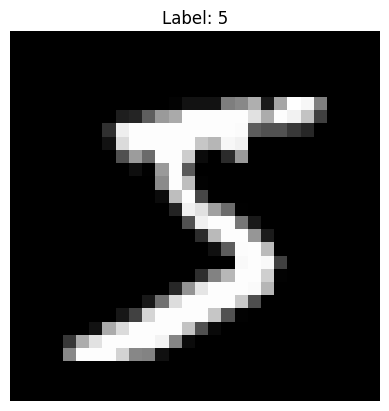

In [5]:
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),

    Dense(10, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [8]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2)
]


In [9]:
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8243 - loss: 0.5969 - val_accuracy: 0.8382 - val_loss: 0.4912 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9701 - loss: 0.0993 - val_accuracy: 0.9851 - val_loss: 0.0506 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9782 - loss: 0.0745 - val_accuracy: 0.9865 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9816 - loss: 0.0587 - val_accuracy: 0.9875 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9846 - loss: 0.0499 - val_accuracy: 0.9894 - val_loss: 0.0391 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9878 - val_loss: 0.0475 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0366 - 

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0344
Test Accuracy: 0.9923999905586243


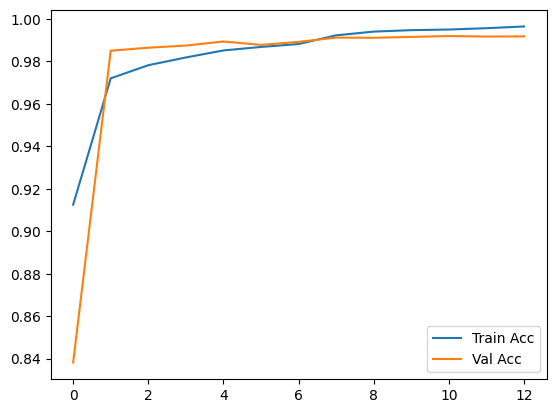

In [11]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Predicted: 7
Actual: 7


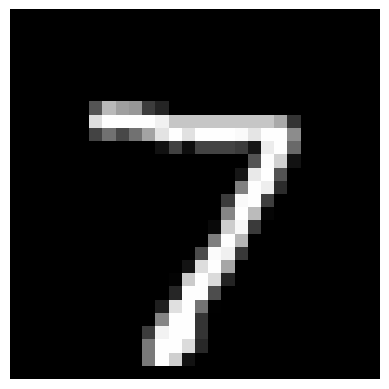

In [12]:
pred = model.predict(X_test[:1])
print("Predicted:", np.argmax(pred))
print("Actual:", y_test[0])

plt.imshow(X_test[0].reshape(28,28), cmap="gray")
plt.axis("off")
plt.show()


In [13]:
model.save("mnist_cnn.h5")

## Testing the model on handwritten image to predict the digit

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


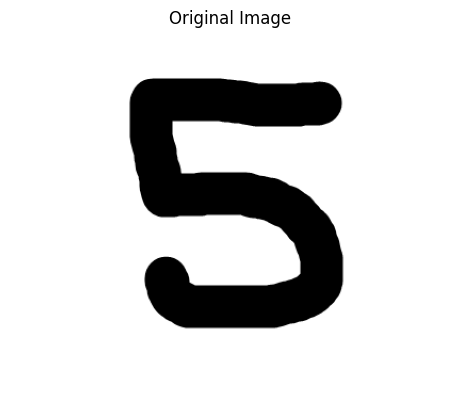

In [15]:
img = cv2.imread("digit.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()


In [16]:
img = cv2.resize(img, (28, 28))

# Invert if background is white
if img.mean() > 127:
    img = 255 - img

img = img.astype("float32") / 255.0
img = img.reshape(1, 28, 28, 1)


In [17]:
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Digit: 5


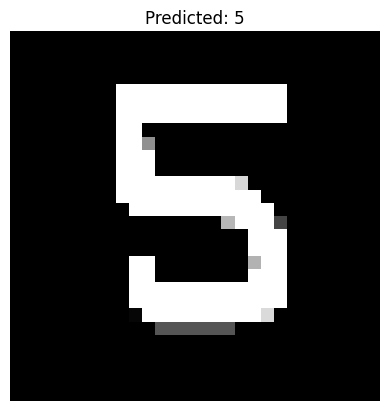

In [18]:
plt.imshow(img.reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_digit}")
plt.axis("off")
plt.show()


# Character Recognition
## Dataset : EMNIST

In [19]:
!pip install tensorflow-datasets


In [20]:
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
train_df = pd.read_csv("emnist-balanced-train.csv")
test_df  = pd.read_csv("emnist-balanced-test.csv")

print(train_df.shape)
print(test_df.shape)

(112799, 785)
(18799, 785)


In [22]:
y_train = train_df.iloc[:, 0].values
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

In [23]:
X_train = X_train.reshape(-1, 28, 28)
X_test  = X_test.reshape(-1, 28, 28)

In [24]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_train = np.fliplr(X_train)

X_test = np.rot90(X_test, k=1, axes=(1,2))
X_test = np.fliplr(X_test)


In [25]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)


In [26]:
y_train_cat = to_categorical(y_train, 47)
y_test_cat  = to_categorical(y_test, 47)

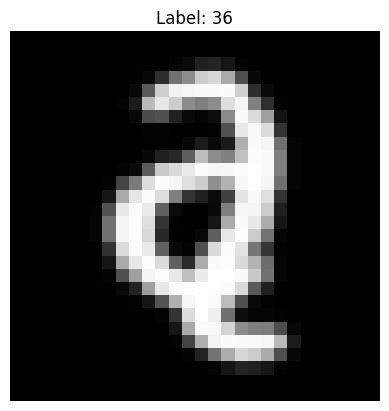

In [27]:
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

In [28]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),

    Dense(47, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,671 (541.68 KB)

 Trainable params: 138,223 (539.93 KB)

 Non-trainable params: 448 (1.75 KB)

In [30]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2)
]

history = model.fit(
    X_train, y_train_cat,
    epochs=25,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.5129 - loss: 1.7418 - val_accuracy: 0.7942 - val_loss: 0.5799 - learning_rate: 0.0010
Epoch 2/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7916 - loss: 0.6172 - val_accuracy: 0.8208 - val_loss: 0.4940 - learning_rate: 0.0010
Epoch 3/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8213 - loss: 0.5158 - val_accuracy: 0.8389 - val_loss: 0.4538 - learning_rate: 0.0010
Epoch 4/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8353 - loss: 0.4698 - val_accuracy: 0.8395 - val_loss: 0.4458 - learning_rate: 0.0010
Epoch 5/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8457 - loss: 0.4387 - val_accuracy: 0.8469 - val_loss: 0.4257 - learning_rate: 0.0010
Epoch 6/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8518 - loss: 0.4148 - val_accuracy: 0.8469 - val_loss: 0.4323 - learning_rate: 0.0010
Epoch 7/25
705/705 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8573 - loss: 0.3982 

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)

588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8627 - loss: 0.4135
Test Accuracy: 0.8625990748405457


In [32]:
emnist_balanced_mapping = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E',
    15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O',
    25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y',
    35: 'Z',
    36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f',
    41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r',
    46: 't'
}


In [33]:
pred = model.predict(X_test[:1])
pred_class = np.argmax(pred)

pred_char = emnist_balanced_mapping[pred_class]

print("Predicted character:", pred_char)
print("True character:", emnist_balanced_mapping[y_test[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
Predicted character: e
True character: e


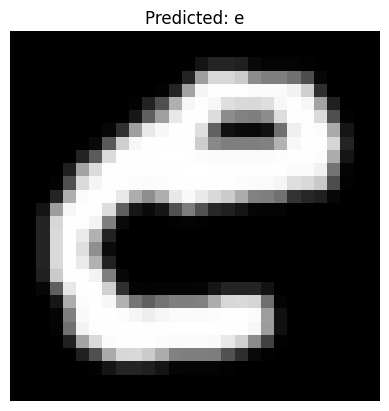

In [34]:
plt.imshow(X_test[0].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {pred_char}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


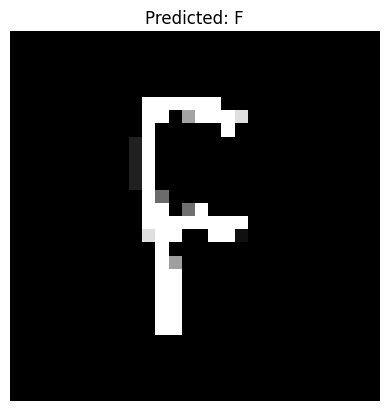

Predicted character: F


In [35]:
import cv2, numpy as np, matplotlib.pyplot as plt

# load image
img = cv2.imread("letter.png", cv2.IMREAD_GRAYSCALE)

# invert if needed
if img.mean() > 127:
    img = 255 - img

# binarize
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# resize directly to 28x28
img = cv2.resize(img, (28, 28))

# normalize + reshape
img = img.astype("float32") / 255.0
img = img.reshape(1, 28, 28, 1)

# predict
pred_char = emnist_balanced_mapping[np.argmax(model.predict(img))]

# show
plt.imshow(img.reshape(28,28), cmap="gray")
plt.title(f"Predicted: {pred_char}")
plt.axis("off")
plt.show()

print("Predicted character:", pred_char)


In [36]:
print(f"Final Test Accuracy: {test_acc*100:.2f}%")


Final Test Accuracy: 86.26%
